In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
titanic = pd.read_csv('titanic_cleaned2.csv')

In [23]:
corr = titanic.corr(numeric_only = True)

In [10]:
print(corr)

              Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  survived       age  \
Unnamed: 0.2      1.000000      1.000000    1.000000 -0.005007  0.034212   
Unnamed: 0.1      1.000000      1.000000    1.000000 -0.005007  0.034212   
Unnamed: 0        1.000000      1.000000    1.000000 -0.005007  0.034212   
survived         -0.005007     -0.005007   -0.005007  1.000000 -0.064910   
age               0.034212      0.034212    0.034212 -0.064910  1.000000   
sibsp            -0.057527     -0.057527   -0.057527 -0.035322 -0.233296   
parch            -0.001652     -0.001652   -0.001652  0.081629 -0.172482   
fare             -0.007425     -0.007425   -0.007425  0.329862  0.110964   
adult_male        0.041010      0.041010    0.041010 -0.557080  0.247704   
alone             0.057462      0.057462    0.057462 -0.203367  0.171647   
FamilySize       -0.040143     -0.040143   -0.040143  0.016639 -0.245619   
IsAlone           0.057462      0.057462    0.057462 -0.203367  0.171647   
Age         

In [24]:
print(corr['survived'])

Unnamed: 0.2   -0.005007
Unnamed: 0.1   -0.005007
Unnamed: 0     -0.005007
survived        1.000000
age            -0.064910
sibsp          -0.035322
parch           0.081629
fare            0.329862
adult_male     -0.557080
alone          -0.203367
FamilySize      0.016639
IsAlone        -0.203367
Age            -0.116024
sex_male       -0.543351
embarked_Q      0.003650
embarked_S     -0.149683
pclass_2        0.093349
pclass_3       -0.322308
Name: survived, dtype: float64


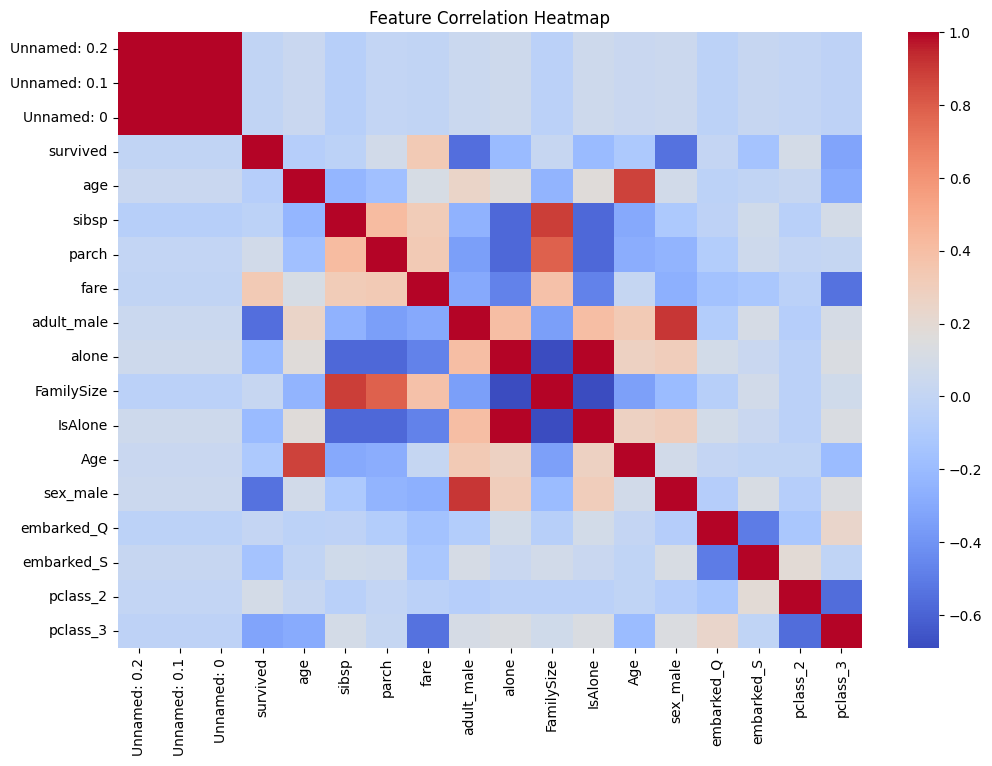

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
titanicc = titanic.select_dtypes(include=['int64', 'float64'])  #get numeric features only for now
X = titanicc.drop('survived', axis=1) 
y = titanicc['survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression(max_iter=1000)

In [29]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7262569832402235

Confusion Matrix:
 [[96  9]
 [40 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       105
           1       0.79      0.46      0.58        74

    accuracy                           0.73       179
   macro avg       0.75      0.69      0.69       179
weighted avg       0.74      0.73      0.71       179

